In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
ds = pd.read_csv('/content/drive/MyDrive/Datasets/exam 1/plt + pd/listings.csv')

# Necessary Columns Only
air = ds.copy()
air = air[['source', 'bedrooms', 'price', 'review_scores_rating','number_of_reviews', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'property_type']]

# Data Cleaning and Filling
air['bedrooms'] = air['bedrooms'].fillna(int(air['bedrooms'].mean()))

def replace_symbols(x):
  if isinstance(x, str):
    return float(x.replace('$', '').replace(',', ''))
  else:
    return x

air['price'] = air['price'].apply(replace_symbols)
air['price'].fillna(air['price'].mean().round(2), inplace=True)
air['review_scores_rating'] = air['review_scores_rating'].fillna(air['review_scores_rating'].mean()).round(2)

In [ ]:
# Descriptive Statistics
columns = ['bedrooms', 'price',
           'number_of_reviews',
           'calculated_host_listings_count',
           'calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms',
           'review_scores_rating']
for col in columns:
  print(f'___{col}___')
  print(f'Mean:', air[f'{col}'].mean())
  print(f'Median:', air[f'{col}'].median())
  print(f'Mode:', air[f'{col}'].mode())
  print(f'Min:', air[f'{col}'].min())
  print(f'Max:', air[f'{col}'].max())
  print()

___bedrooms___
Mean: 1.3357664233576643
Median: 1.0
Mode: 0    1.0
Name: bedrooms, dtype: float64
Min: 0.0
Max: 26.0

___price___
Mean: 205.2717856507032
Median: 205.27
Mode: 0    205.27
Name: price, dtype: float64
Min: 8.0
Max: 100000.0

___number_of_reviews___
Mean: 24.91810575040057
Median: 4.0
Mode: 0    0
Name: number_of_reviews, dtype: int64
Min: 0
Max: 1897

___calculated_host_listings_count___
Mean: 48.61046822147053
Median: 1.0
Mode: 0    1
Name: calculated_host_listings_count, dtype: int64
Min: 1
Max: 842

___calculated_host_listings_count_entire_homes___
Mean: 24.932831455530405
Median: 1.0
Mode: 0    1
Name: calculated_host_listings_count_entire_homes, dtype: int64
Min: 0
Max: 842

___calculated_host_listings_count_private_rooms___
Mean: 22.77735954627534
Median: 1.0
Mode: 0    0
Name: calculated_host_listings_count_private_rooms, dtype: int64
Min: 0
Max: 627

___calculated_host_listings_count_shared_rooms___
Mean: 0.06518477072153411
Median: 0.0
Mode: 0    0
Name: calculat

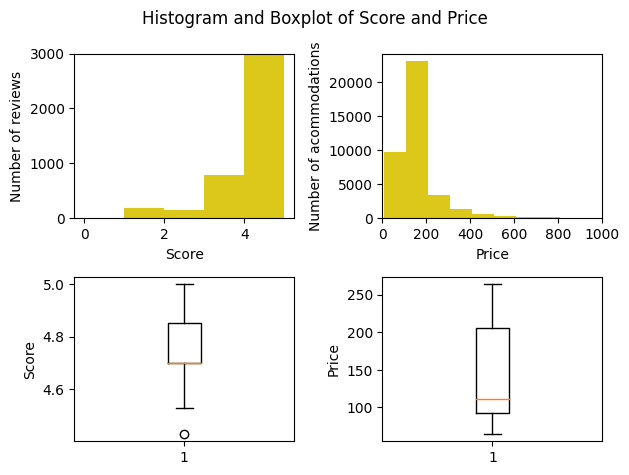

In [ ]:
# Data Visualization
fig, ax = plt.subplots(2, 2)

ax[0][0].hist(air['review_scores_rating'], bins=5, lw=1.5, color='#dbc81a')
ax[0][0].set_ylim(0, 3000)
ax[0][0].set_xlabel('Score')
ax[0][0].set_ylabel('Number of reviews')

ax[0][1].hist(air['price'], bins=1000, color='#dbc81a')
ax[0][1].set_xlim(0, 1000)
ax[0][1].set_xlabel('Price')
ax[0][1].set_ylabel('Number of acommodations')

ax[1][0].boxplot(air['review_scores_rating'][::3000])
ax[1][0].set_ylabel('Score')

ax[1][1].boxplot(air['price'][::3600])
ax[1][1].set_ylabel('Price')

plt.suptitle('Histogram and Boxplot of Score and Price')
plt.tight_layout()
plt.show()

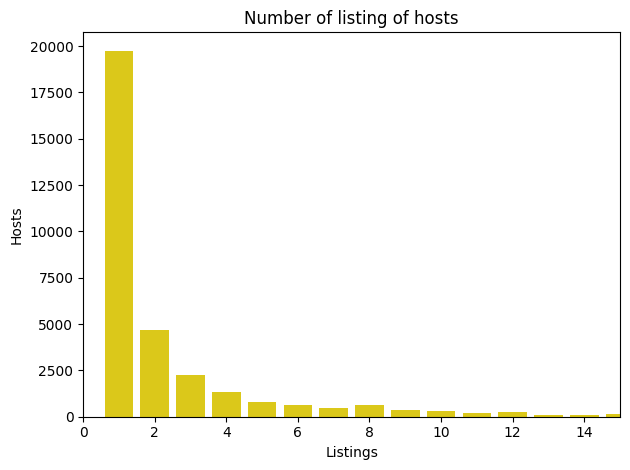

In [ ]:
# Data Visualization
fig, ax = plt.subplots()

x = air['calculated_host_listings_count'].value_counts().index
y = air['calculated_host_listings_count'].value_counts().values

ax.bar(x, y, color='#dbc81a')
ax.set_xlim(0, 15)
ax.set_xlabel('Listings')
ax.set_ylabel('Hosts')

plt.title('Number of listing of hosts')
plt.tight_layout()
plt.show()

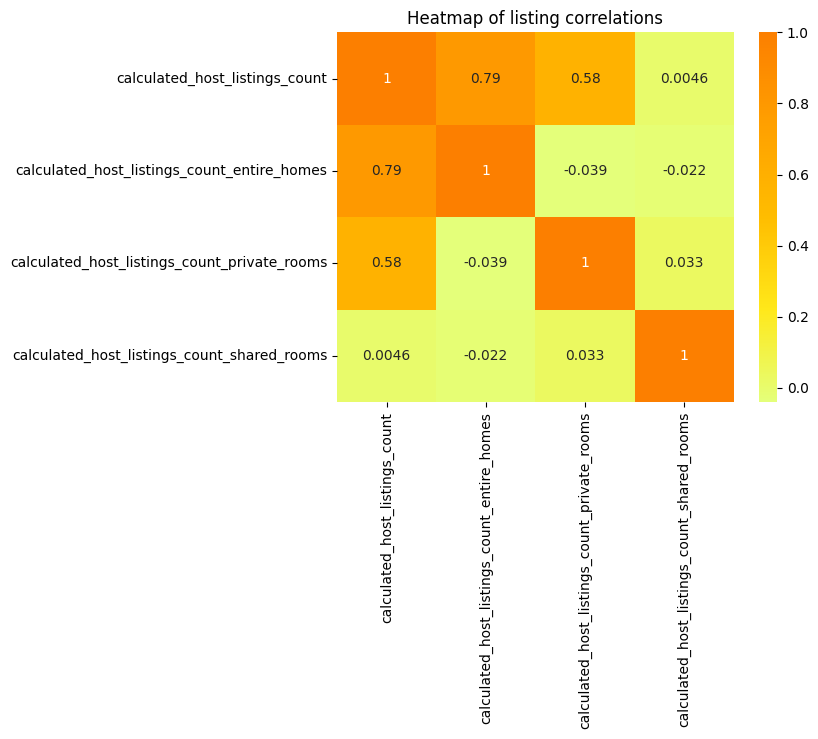

In [ ]:
# Data Visualization
listing = air[['calculated_host_listings_count',
           'calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms']]

sns.heatmap(listing.corr(), cmap='Wistia', annot=True)
plt.title('Heatmap of listing correlations')

plt.show()

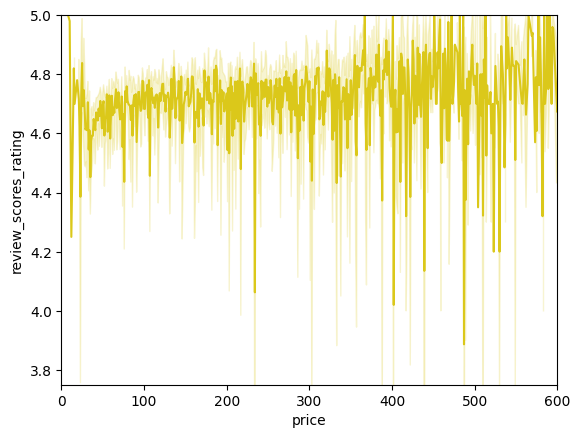

In [302]:
# Data Visualization
to_line = air[['review_scores_rating', 'price']][:]
line = sns.lineplot(x='price', y='review_scores_rating', data=to_line, color='#dbc81a')
line.set_xlim(0, 600)
line.set_ylim(3.75, 5)

plt.show()